In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
    horizontal-align: middle;
}
h1{
    text-align: center;
    background-color: #B983FF;
    padding: 20px;
    margin: 0;
    color: white;
    font-family: ariel;
    border-radius: 80px;
}

h2 {
    text-align: center;
    background-color: #94B3FD;
    padding: 20px;
    margin: 0;
    color: white;
    font-family: ariel;
    border-radius: 80px;
}

h3 {
    text-align: center;
    border-style: solid;
    border-width: 3px;
    padding: 12px;
    margin: 0;
    color: black;
    font-family: ariel;
    border-radius: 80px;
    border-color: #99FEFF;
}

body, p {
    font-family: ariel;
    font-size: 15px;
    color: charcoal;
}
div {
    font-size: 14px;
    margin: 0;

}

h4 {
    padding: 0px;
    margin: 0;
    font-family: ariel;
    color: purple;
}
</style>
""")

# Implementation of Linear Regression from Scratch in Python
### ✨ WELCOME ✨
Linear regression is a supervised learining algorithm used when target / dependent variable continues real number. Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values. When there is a single input variable (x), the method is referred to as simple linear regression. When there are multiple input variables, literature from statistics often refers to the method as multiple linear regression.Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called Ordinary Least Squares.

Linear regression uses the very basic idea of prediction. Here is the formula:

Y = C + BX

Here, Y is the dependent variable, B is the slope and C is the intercept.

For linear regression, it is written as:

$$\mathbf{ h_ = \theta_0 + \theta_1x_i }$$   

Here, ‘h’ is the hypothesis or the predicted dependent variable, X is the input feature, and theta0 and theta1 are the coefficients. Theta values are initialized randomly to start with.

![unnamed-chunk-2-1.png](attachment:8714331d-ccd8-4759-82c7-d02b669230db.png)

All three lines have different set of theta values. Our goal is to find the best values of Theta that gives the best fit line and produces most accurate predictions.

##  INDEX :- Simple Linear Regression :-
### 1. Hypothesis
### 2. Mean Squared Error
### 3. Cost Function
### 4. Gradient Descent
### 5. Applying Linear Regression from scratch to hardwrk dataset
##  INDEX :- Multivariate Linear Regression :-
### 1. Hypothesis
### 2. Cost Function
### 3. Gradient Descent
### 4. Applying Linear Regression from scratch to Boston dataset






## If you like my work, feel free to upvote and comment !¶
#### I'd love to hear your thoughts about this notebook! Constructive Criticism is always welcomed😄 Do share any better method, model or techniques I should try and improvements in this notebook(if any). I hope you like my work ✨ Thankyou for your time🙏

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# ✨Simple Linear Regression✨

## Preparing the Dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#loading the data
X = pd.read_csv('./Linear_X_Train.csv')
y = pd.read_csv('./Linear_Y_Train.csv')

In [20]:
#converting to numpy arrays
X=X.values
y=y.values

In [21]:
for x0, y0 in zip(X, y):
  print(x0, y0)

[-0.28930742] [-0.09110112]
[-0.58880963] [-53.46772085]
[1.02750749] [75.45700878]
[-0.25901303] [-12.02528565]
[0.78204318] [57.4141869]
[-1.6752299] [-110.84941211]
[-0.74608049] [-49.45419029]
[1.97939985] [132.39621408]
[0.76694066] [72.19885576]
[-0.60571855] [-51.27436645]
[0.48298073] [16.93802477]
[-1.05974683] [-80.75605062]
[0.27947639] [17.58640547]
[0.11448254] [4.07318425]
[0.40591061] [38.27562331]
[-0.09037849] [-26.51962733]
[1.52250153] [124.97270552]
[-0.05178123] [9.6114339]
[-0.69308188] [-73.13397378]
[-0.54150372] [-10.48264053]
[-2.02081048] [-154.30108083]
[0.3752779] [22.31385236]
[0.68088412] [21.50823648]
[1.17859929] [89.96597905]
[-0.79415869] [-47.08830432]
[0.79569536] [55.78384852]
[-0.58067143] [-17.11951475]
[-0.49931327] [-53.08340589]
[-1.06751931] [-77.46920808]
[0.81847241] [90.9381863]
[-0.49212786] [-24.46404598]
[-1.51333479] [-112.01186263]
[-0.16835456] [-27.36722518]
[1.10453566] [63.40931137]
[-0.94646494] [-83.61151706]
[-0.59379464] [-6.0

<ipython-input-22-5de469bbc3c9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


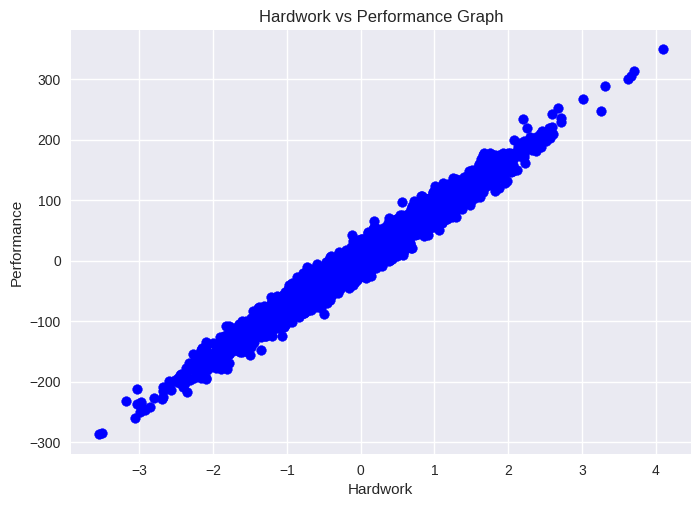

In [22]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='blue')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [23]:
#normalisation of data
u=X.mean()
std=X.std()
X=(X-u)/std

In [24]:
print(f"Mean is: {u}")
print(f"STD is: {std}")

Mean is: -0.03779466168006854
STD is: 0.9920801322508517


In [27]:
u=X.mean()
std=X.std()
print(f"Mean is: {u}")
print(f"STD is: {std}")

Mean is: -5.684341886080802e-18
STD is: 1.0


<ipython-input-28-5de469bbc3c9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


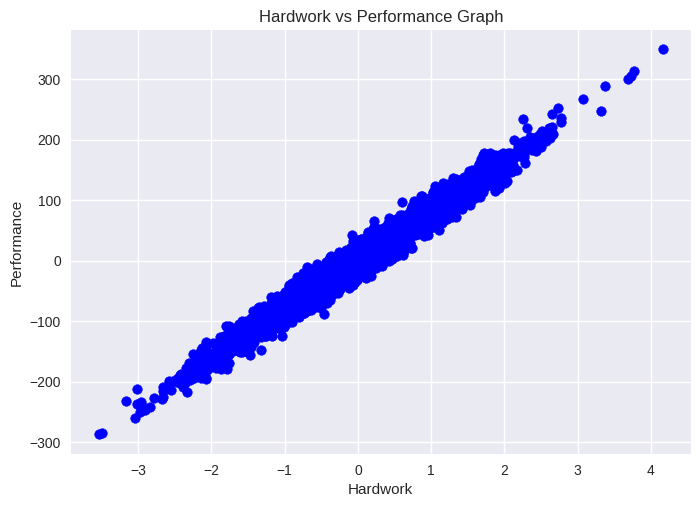

In [28]:
# Visualise
plt.style.use('seaborn')
plt.scatter(X,y,color='blue')
plt.title("Hardwork vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

### Hypothesis

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscript $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as

$$\mathbf{ h_ = \theta_0 + \theta_1x_i }$$   

$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**.

In [29]:
def hypothesis(x,theta):
    y_ = theta[0] + theta[1]*x
    return y_

### Error Function
1. Let's calculate error for one example :-

$$E = mod [y_{prediced}^i - y_{actual}^i]$$

2. Total error over all examples :-

Sum of the errors over all the examples.

![new.jpg](attachment:ea3cdcbf-5a81-42c4-831c-44244d8bd91c.jpg)


This is called as the Absolute Error. We do not use absolute error as this functions is not differentiable.

3. Therefor we calculate MSE (Mean Squared Error) :-

![images.png](attachment:d08b1be3-b3a9-4f95-b72d-6fd46ca37edb.png)

Let’s analyze what this equation actually means.

In mathematics, the character that looks like weird E is called summation (Greek sigma). It is the sum of a sequence of numbers, from i=1 to n. Let’s imagine this like an array of points, where we go through all the points, from the first (i=1) to the last (i=n).

For each point, we take the y-coordinate of the point, and the y’-coordinate. The y-coordinate is our purple dot. The y’ point sits on the line we created. We subtract the y-coordinate value from the y’-coordinate value, and calculate the square of the result.

The third part is to take the sum of all the (y-y’)² values, and divide it by n, which will give the mean.
Our goal is to minimize this mean, which will provide us with the best line that goes through all the points.

This is also known as the Loss/Cost Function.

#### In the code below we calculate the MSE function


In [30]:
def error(X,Y,theta):
    m = X.shape[0] #total no. of examples
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2

    return (total_error/m)

### Gradient

The idea of any machine learning algorithm is to minimize the cost function so that the hypothesis is close to the original dependent variable. We need to optimize the theta value to do that. If we take the partial derivative of the cost function based on theta0 and theta1 respectively, we will get the gradient descent. To update the theta values we need to deduct the gradient descent from the corresponding theta values:

![1_5_3TeXfjy-2uTXEe1dms9A.png](attachment:1ca26676-0d51-4a9b-b10f-1e461b471897.png)

#### In the Code below we implement the highlighted part:-

![now.jpg](attachment:e35ef028-3723-42e6-aa83-b9ba8f21bf40.jpg)

In [31]:
def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x,theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

 ### Gradient Descent
Gradient descent in our context is an optimization algorithm that aims to adjust the parameters in order to minimize the cost function . So we multiply the derivative of the cost function with the learning rate(α) and subtract it from the present value of the parameters(θ) to get the new updated parameters(θ).

#### Below Code is an implementation of the steps taken in Gradient Descent:-

Step 1 :- Initialize theta with random values

Step 2 :- Measure how good is our theta using the error function. Best Theta is the one for which error is the least.

Step 3 :- Calculate the gradient used to update the theta values

Step 4 :- Update the theta values


In [32]:
def gradientDescent(X,Y,max_steps=100,learning_rate =0.1):

    theta = np.zeros((2,))
    error_list = []
    theta_list = []


    for i in range(max_steps):

        # Compute grad
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)[0]


        #Update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        # Storing the theta values during updates
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)

    return theta,error_list,theta_list

In [33]:
theta,error_list,theta_list = gradientDescent(X,y)

<ipython-input-31-a8e8db8b6bcb>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[0] += (y_ - y)
<ipython-input-31-a8e8db8b6bcb>:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grad[1] += (y_ - y)*x


In [34]:
theta

array([ 0.6838508 , 79.90361453])

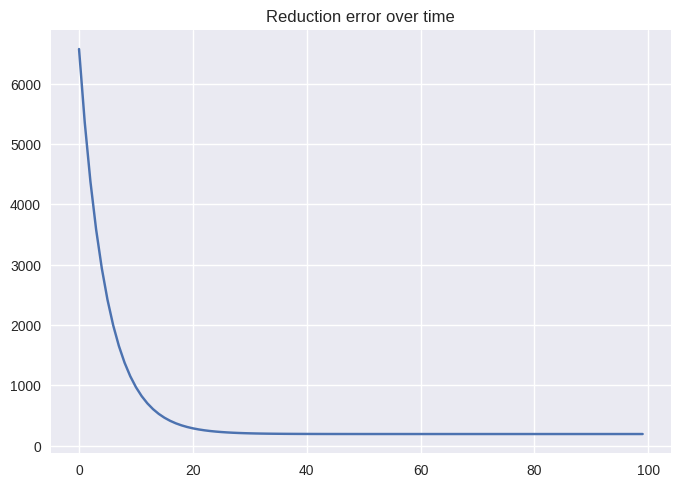

In [35]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

In [36]:
## Predictions and Best Line
y_ = hypothesis(X,theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


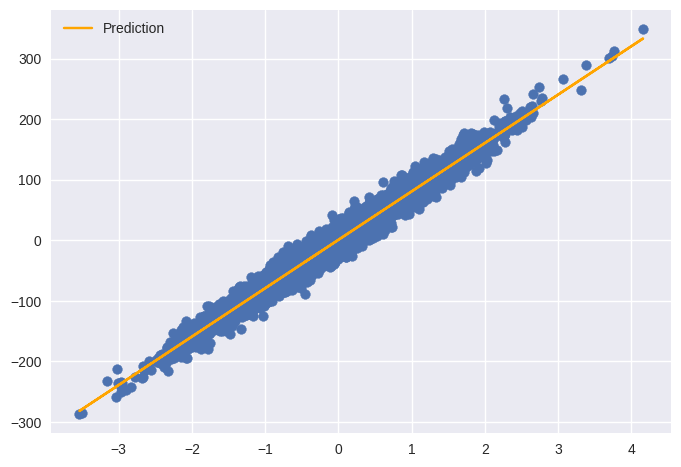

In [37]:
# Training + Predictions
plt.scatter(X,y)
plt.plot(X,y_,color='orange',label="Prediction")
plt.legend()
plt.show()

#### Metric for Evaluation :-
#### **R2 SCORE** :-

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

R2= 1- SSres / SStot

The lowest R-squared is 0 and means that the points are not explained by the regression whereas the highest R-squared is 1 and means that all the points are explained by the regression line. For example, an R-squared of . 85 means that the regression explains 85% of the variation in our y-variable.


In [40]:
#coeff of determination
def r2_score(Y,Y_):
    # Instead of Loop, np.sum is recommended as it is fast
    num = np.sum((Y-Y_)**2)
    denom = np.sum((Y- Y.mean())**2)
    score = (1- num/denom)
    return score

In [41]:
r2_score(y,y_)

0.9709612226971643

# ✨Multivariate Linear Regression✨

## Preparing the Dataset

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
boston = load_boston()
X = boston.data
y = boston.target

In [44]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [46]:
X = data
y = target

In [50]:
import pandas as pd
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [51]:
df.columns[11]

11

In [52]:
df= df.drop([11],axis=1)

In [53]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [54]:
X=df.values

In [55]:
# Normalise this dataset
# Each feature must have 0 mean, unit variance
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

In [56]:
u, std

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 7.13400164e+00]))

In [59]:
# Normalise the Data
X = (X-u)/std

In [60]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)

In [61]:
u, std

(array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16, -3.51058664e-17,
        -1.96592852e-16, -1.08828186e-16, -1.47444639e-16, -8.42540793e-17,
        -1.12338772e-16,  0.00000000e+00, -4.21270397e-16, -3.08931624e-16]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [62]:
# Normalised Data
pd.DataFrame(X[:5,:]).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501


### Hypothesis

For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as

$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$
$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,

$\mathbf{m}$ Number of training exaples,

$\mathbf{n}$ Number of independent variable,

$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.

We introduce $\mathbf{x_0}$ =1 so that we can convert this to a summation term easily

$$\mathbf{h_\theta(x_{i}) = \theta_0x_{i0} + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$

$$\sum\limits_{x=1}^{m} {\theta_ix_{i} } = J (\theta_0)$$

The below code is an implementation of this sum function

In [63]:
def hypothesis(x,theta):
    # Optimized :- return np.dot(X,theta)
    y_ = 0.0
    n = x.shape[0]
    for i in range(n):
        y_  += (theta[i]*x[i])
    return y_

### Error Function
The cost function is the indication of the difference between the original output and the predicted output. The idea of a machine learning algorithm is to minimize the cost function so that the difference between the original output and the predicted output is closer.
![Cost_Function_Formula.png](attachment:d1f835eb-508b-4291-a369-c53a71061e48.png)

The below code is the exact implementation of this equation :-

In [64]:
def error(X,y,theta):
    e = 0.0
    m = X.shape[0]

    for i in range(m):
        y_ = hypothesis(X[i],theta)
        e += (y[i] - y_)**2
        # Optimized :- e = np.sum((y-y_)**2)
    return e/m

We update the theta values. We take the partial differential of the cost function with respect to each theta value and deduct that value from the existing theta value.Here, alpha is the learning rate and it is a constant.

![now.jpg](attachment:fffd6978-0345-4125-912c-65adec421877.jpg)

We calculate this part for all theta values.
Below Code is an implementation of the same.

In [65]:
def gradient(X,y,theta):
    m,n = X.shape

    grad = np.zeros((n,))

    # for all values of j
    for j in range(n):
        #sum over all examples
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_ - y[i])*X[i][j]
            #Optimization :- grad = np.dot(X.T,(y_ - y))

    # Out of the loops
    return grad/m

### Gradient Descent
Gradient descent in our context is an optimization algorithm that aims to adjust the parameters in order to minimize the cost function . So we multiply the derivative of the cost function with the learning rate(α) and subtract it from the present value of the parameters(θ) to get the new updated parameters(θ).

#### Below Code is an implementation of the steps taken in Gradient Descent:-

Step 1 :- Initialize theta with random values

Step 2 :- Measure how good is our theta using the error function. Best Theta is the one for which error is the least.

Step 3 :- Calculate the gradient used to update the theta values

Step 4 :- Update the theta values

In [72]:
def gradient_descent(X,y,learning_rate=0.01,max_epochs=300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []

    for i in range(max_epochs):
        e = error(X,y,theta)
        error_list.append(e)

        # Gradient Descent
        grad = gradient(X,y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]

    return theta,error_list

In [73]:
theta,error_list = gradient_descent(X,y)


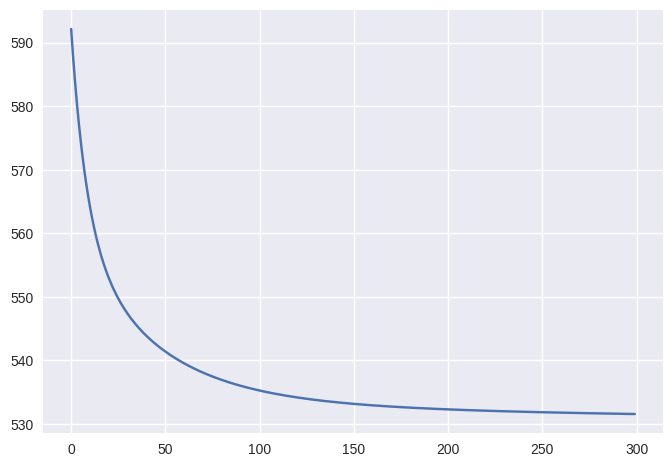

In [74]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

## Refer to all the detailed derivations in my handwritten notes on GitHub :-
https://github.com/vanshika230/Machine-Learning/tree/main/AlgorithmsHandwrittenNotes

## References
1. https://towardsdatascience.com/basic-linear-regression-algorithm-in-python-for-beginners-c519a808b5f8
2. https://towardsdatascience.com/coding-linear-regression-from-scratch-c42ec079902
3. https://www.geeksforgeeks.org/python-coefficient-of-determination-r2-score/
4. https://medium.com/geekculture/linear-regression-from-scratch-in-python-without-scikit-learn-a06efe5dedb6
5. https://www.edureka.co/blog/linear-regression-in-python/
6. https://www.geeksforgeeks.org/ml-linear-regression/
7. https://www.kaggle.com/hamidhaghshenas/high-quality-mathematical-equations-using-latex
8. https://towardsdatascience.com/multivariate-linear-regression-in-python-step-by-step-128c2b127171
9. https://satishgunjal.com/multivariate_lr/